In [3]:
import glob
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_imgs_path = glob.glob(r'../data/4weather/*.jpg')
all_imgs_path[:3]

['../data/4weather\\cloudy1.jpg',
 '../data/4weather\\cloudy10.jpg',
 '../data/4weather\\cloudy100.jpg']

In [5]:
species = ['cloudy', 'rain', 'shine', 'sunrise']

In [7]:
species_to_idx = dict((c, i) for i, c in enumerate(species))
species_to_idx

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [8]:
idx_to_species = dict((v, k) for k, v in species_to_idx.items())
idx_to_species

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}

In [9]:
all_labels = []
for img in all_imgs_path:
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)

In [11]:
all_labels[-5:], all_imgs_path[-5:]

([3, 3, 3, 3, 3],
 ['../data/4weather\\sunrise95.jpg',
  '../data/4weather\\sunrise96.jpg',
  '../data/4weather\\sunrise97.jpg',
  '../data/4weather\\sunrise98.jpg',
  '../data/4weather\\sunrise99.jpg'])

In [12]:
index = np.random.permutation(len(all_imgs_path))
all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]

In [15]:
all_imgs_path[:5], all_labels[:5]

(array(['../data/4weather\\sunrise120.jpg',
        '../data/4weather\\sunrise263.jpg',
        '../data/4weather\\sunrise253.jpg',
        '../data/4weather\\cloudy107.jpg',
        '../data/4weather\\shine112.jpg'], dtype='<U31'),
 array([3, 3, 3, 0, 2]))

In [16]:
s = int(len(all_imgs_path)*0.8)
s

897

In [17]:
train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]

In [18]:
trans = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor()
])

In [19]:
class MyDataset(data.Dataset):
    def __init__(self, imgs_path, labels, transform) -> None:
        super().__init__()
        self.imgs = imgs_path
        self.labels = labels
        self.trans = transform

    def __getitem__(self, index):
        img = self.imgs[index]
        label = self.labels[index]

        pil_img = Image.open(img)
        tensor_img = self.trans(pil_img)

        return tensor_img, label
    
    def __len__(self):
        return len(self.imgs)

In [20]:
train_dataset = MyDataset(train_imgs, train_labels, trans)
test_dataset = MyDataset(test_imgs, test_labels, trans)

In [21]:
BATCHSIZE = 16
train_iter = data.DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)
test_iter = data.DataLoader(test_dataset, batch_size=BATCHSIZE)

In [22]:
imgs, labels = next(iter(train_iter))
imgs.shape, labels.shape

(torch.Size([16, 3, 96, 96]), torch.Size([16]))

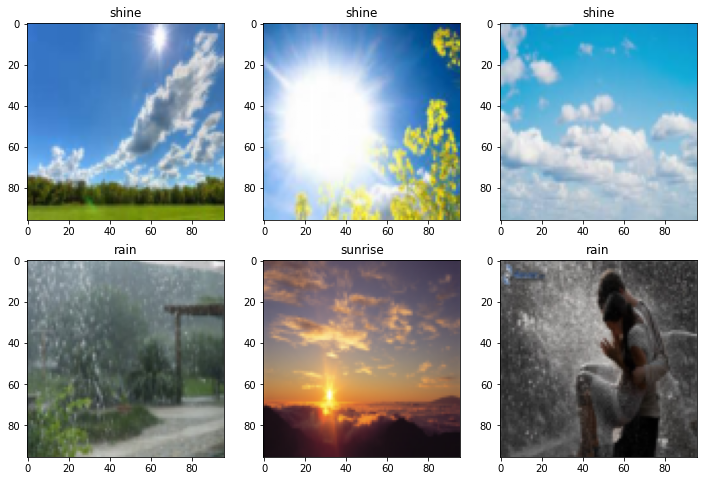

In [24]:
plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs[:6], labels[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i + 1)
    plt.title(idx_to_species.get(label.item()))
    plt.imshow(img)